# 주성분 분석(pca),iris
---

### 데이터 준비

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import myutils as my
from sklearn import datasets

iris = datasets.load_iris()

In [79]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [80]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [81]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [82]:
### 데이터 분리
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(X.shape,y.shape)

(150, 4) (150,)


In [83]:
# 테스 셋 분리
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                 stratify=y,
                                                 random_state=2022)

### 정규화
- 표준화

In [84]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)


StandardScaler()

In [85]:
X_train = scaler.transform(X_train)
y_train = y_train.values

In [86]:
X_train[:5]

array([[ 0.74198233, -0.32371562,  0.33532535,  0.13579779],
       [ 0.24176952, -1.91389762,  0.73771577,  0.39652954],
       [-0.00833688, -0.77805333,  0.10538797,  0.00543191],
       [ 1.11714194, -0.09654676,  0.85268446,  1.43945654],
       [-0.50854969,  1.94797295, -1.15926764, -1.03749509]])

### 차원축소

In [87]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_train[:5]

array([[ 0.74724333, -0.0126806 ],
       [ 1.30073335, -1.63483243],
       [ 0.27281011, -0.72202793],
       [ 1.91391623,  0.46639386],
       [-2.05411407,  1.50098203]])

In [89]:
df = pd.DataFrame(X_train,columns = ['x1','x2'])


In [94]:
df['y_train'] = y_train

<AxesSubplot: xlabel='x1', ylabel='x2'>

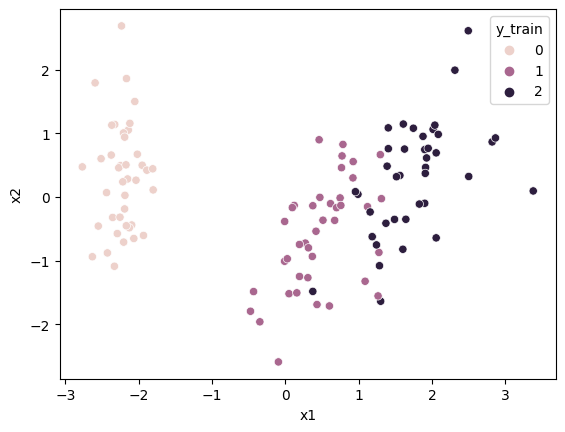

In [96]:
sns.scatterplot(data=df,x='x1',y='x2',hue='y_train')

### 분류(결정트리)

In [107]:
df
df_X = df.drop('y_train',axis=1)
df_y = df['y_train']

In [113]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=3,random_state=2022)
clf.fit(df_X,df_y)

DecisionTreeClassifier(max_depth=3, random_state=2022)

In [115]:
clf.score(df_X,df_y)

0.9416666666666667

In [116]:
human = pd.read_csv('HumanActivityRecognition/test.csv')
human.shape

(2947, 563)

In [ ]:
human_pca = 